In [16]:
import os

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve

    urlretrieve("https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py", "thinkdsp.py")

from thinkdsp import decorate, read_wave

### Упражнение 10.1

#### Выстрел

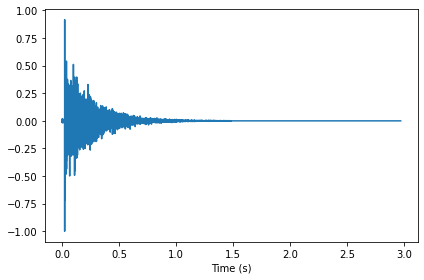

In [17]:
shot = read_wave('resources/Sounds/task1_kleeb_gunshot.wav')
shot.make_audio()

shot = shot.segment(start=0.12)
shot.shift(-0.12)

shot.truncate(2**16)
shot.zero_pad(2**17)

shot.normalize()
shot.plot()
decorate(xlabel='Time (s)')

Получение спектра

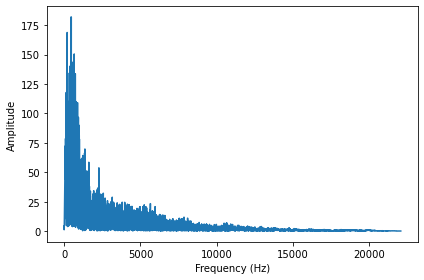

In [18]:
transfer = shot.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

#### Скрипка

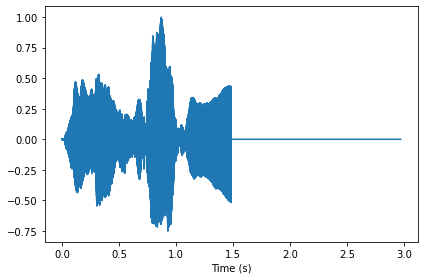

In [19]:
violin = read_wave('resources/Sounds/task1_jcveliz_violin_origional.wav')
violin.make_audio()

violin = violin.segment(start=0.11)
violin.shift(-0.11)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

Получение спектра

In [20]:
violin_spectrum = violin.make_spectrum()
violin_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')


Умножение ДПФ сигнала на передаточную функцию
и преобразование обратно в сигнал

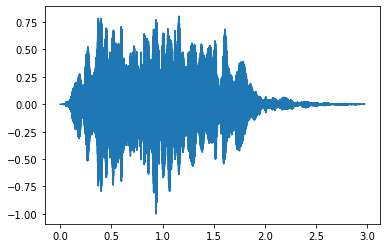

In [21]:
output = (violin_spectrum * transfer).make_wave()
output.normalize()
output.plot()
output.make_audio()


### Упражнение 10.2

Чтение импульсной характеристики


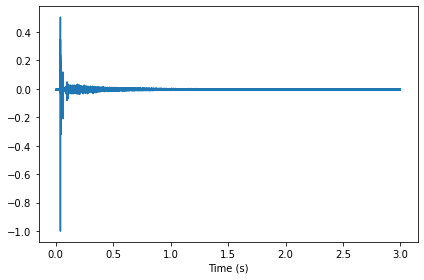

In [22]:
response = read_wave('resources/Sounds/task2_1st_baptist_nashville_balcony.wav')
response = response.segment(duration=3)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')
response.make_audio()

Формирование передаточной функции

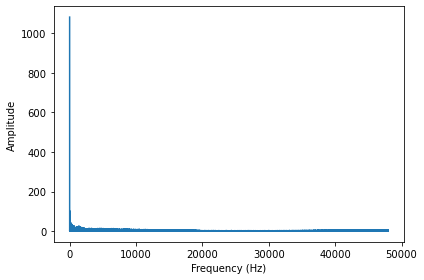

In [23]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')


Логарифмический масштаб

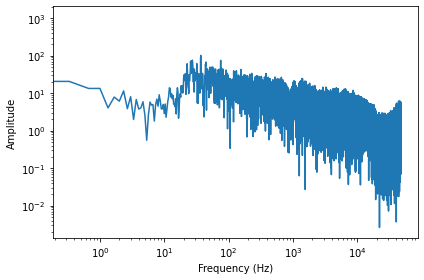

In [24]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude',
         xscale='log', yscale='log')


Чтение записи колокольчиков

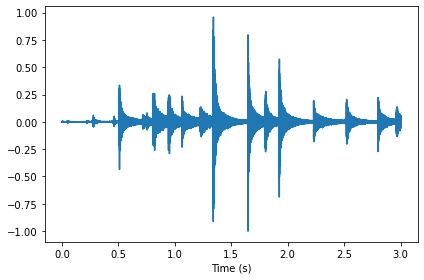

In [25]:
bell_wave = read_wave('resources/Sounds/task2_stomachache_cowbell.wav')
bell_wave = bell_wave.segment(start=0)

bell_wave.truncate(len(response))
bell_wave.normalize()
bell_wave.plot()
decorate(xlabel='Time (s)')
bell_wave.make_audio()

Получение ДПФ

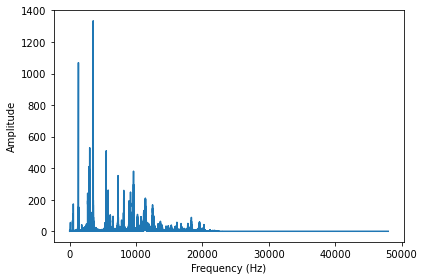

In [26]:
bell_spectrum = bell_wave.make_spectrum()
bell_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [27]:
bell_spectrum.fs

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       4.79993333e+04, 4.79996667e+04, 4.80000000e+04])

In [28]:
transfer.fs

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       4.79993333e+04, 4.79996667e+04, 4.80000000e+04])

Умножение ДПФ на фильтр

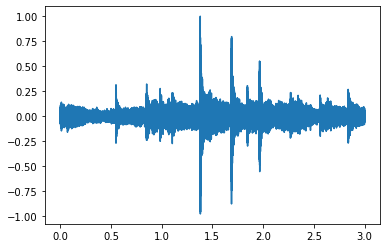

In [29]:
output = (bell_spectrum * transfer).make_wave()
output.normalize()
output.plot()
output.make_audio()

Использование свертки

In [30]:
convolved2 = bell_wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()
